# Comparing activation functions for a minimal model
The opposing paper argues that input compression is merely an artifact of saturating activation functions. We test this assumption for the minimal model in a numeric simulation. We look at the development of mututal information with the input for a one neuron model for different activation functions with growing weights.

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

/home/jarno/.miniconda/envs/dneck/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
weights = np.arange(0, 10, 0.1)

The input is sampled from a standard normal distribution.

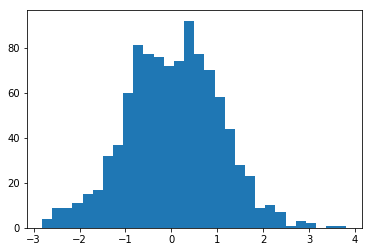

In [4]:
input_distribution = stats.norm()
input_ = input_distribution.rvs(1000)
plt.hist(input_, bins=30);

In [5]:
net_input = np.outer(weights, input_)

The activation functions we want to test.

In [6]:
def hard_sigmoid(x):
    lower_bound = -2.5
    upper_bound = 2.5
    linear = 0.2 * x + 0.5
    linear[x < lower_bound] = 0
    linear[x > upper_bound] = 1
    return linear

def linear(x):
    return x

activation_functions = [tf.nn.sigmoid, tf.nn.tanh, tf.nn.relu, tf.nn.softsign, tf.nn.softplus, hard_sigmoid, 
                       tf.nn.selu, tf.nn.relu6, tf.nn.elu, tf.nn.leaky_relu, linear]

First we look at the shape of the different activation functions. We see that some are saturating like `tanh` and some are not like `relu`.

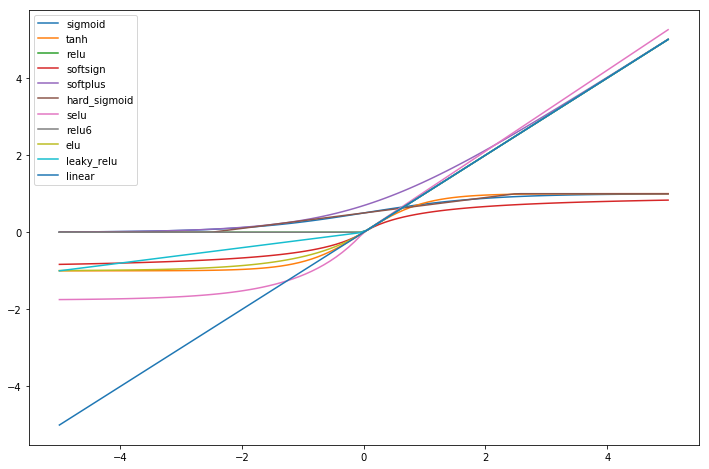

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
for actvation_function in activation_functions:
    x = np.linspace(-5,5,100)
    ax.plot(x, actvation_function(x), label=actvation_function.__name__)
plt.legend()

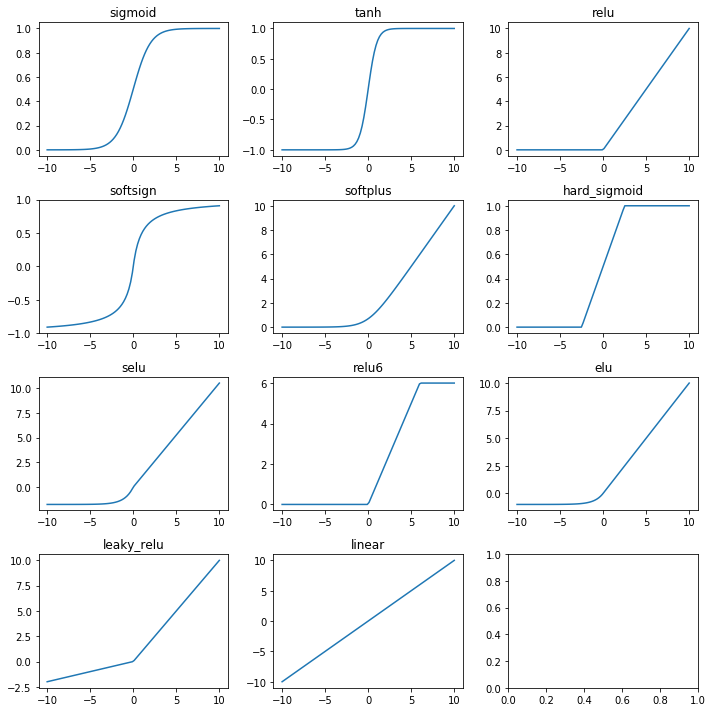

In [8]:
fig, ax = plt.subplots(nrows=int(len(activation_functions)/3)+1, ncols=3, figsize=(10, 10))
ax = ax.flat

for i, actvation_function in enumerate(activation_functions):
    x = np.linspace(-10,10,100)
    ax[i].plot(x, actvation_function(x))
    ax[i].set(title=actvation_function.__name__)
plt.tight_layout()

In [9]:
outputs = {}
for actvation_function in activation_functions:
    try:
        outputs[actvation_function.__name__] = actvation_function(net_input).numpy()
    except AttributeError:
        outputs[actvation_function.__name__] = actvation_function(net_input)

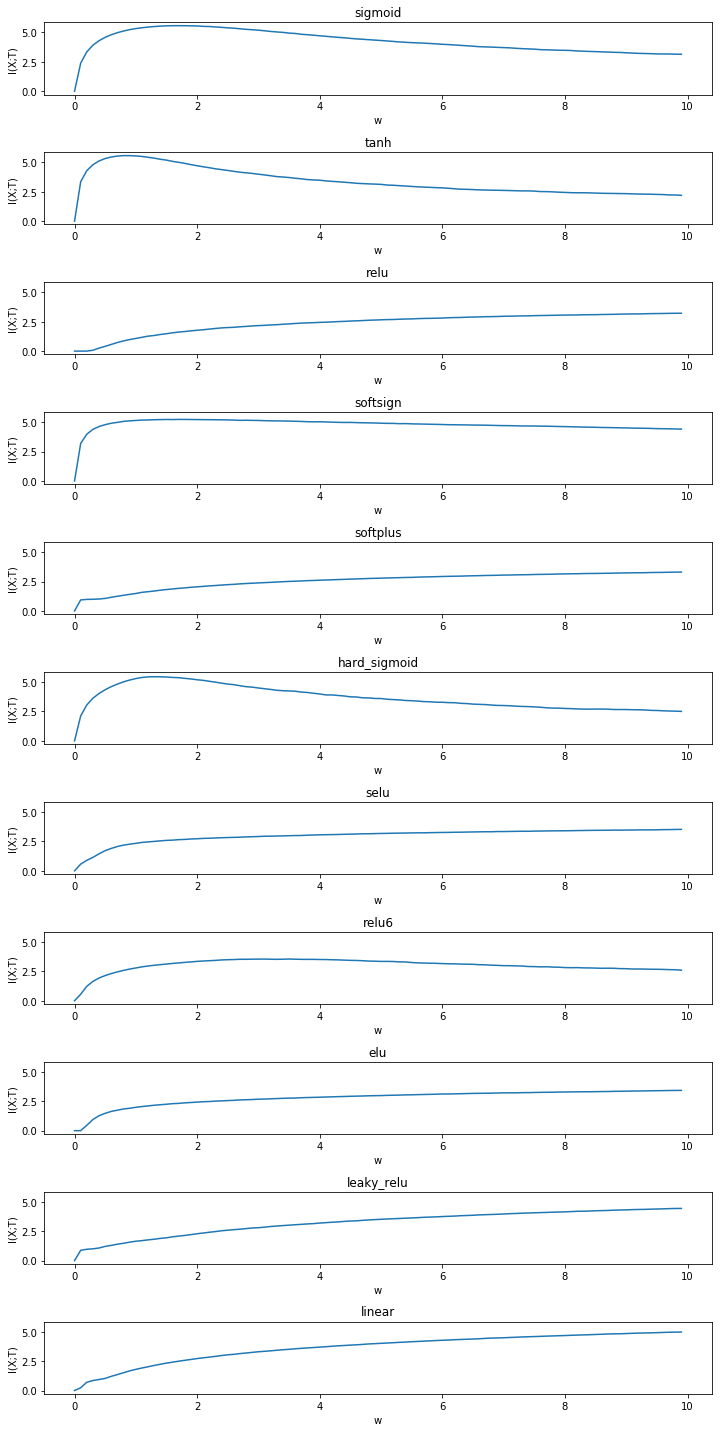

In [9]:
fig, ax = plt.subplots(nrows=len(outputs), figsize=(10, 20), sharey=True)
ax = ax.flat
for ax_idx, (activation_function, Y) in enumerate(outputs.items()):
    min_acitivity = Y.min()
    max_acitivity = Y.max()
    
    mi = np.zeros(len(weights))
    for i in range(len(weights)):
        binsize = 0.07
        bins = np.linspace(min_acitivity, max_acitivity, 50)
        digitized, _ = np.histogram(Y[i], bins=bins)
        
        mi[i] = stats.entropy(digitized, base=2) 
    ax[ax_idx].plot(weights,  mi)
    ax[ax_idx].set(title=activation_function, xlabel='w', ylabel='I(X;T)') 
plt.tight_layout()

5.612941091039464
5.612941091039464
3.2403374508405753
5.522320815692948
4.98280026964171
5.481347019916177
5.170593812369352
3.5662305531699126
5.062717487559174
4.499281085084354
5.012404003043081


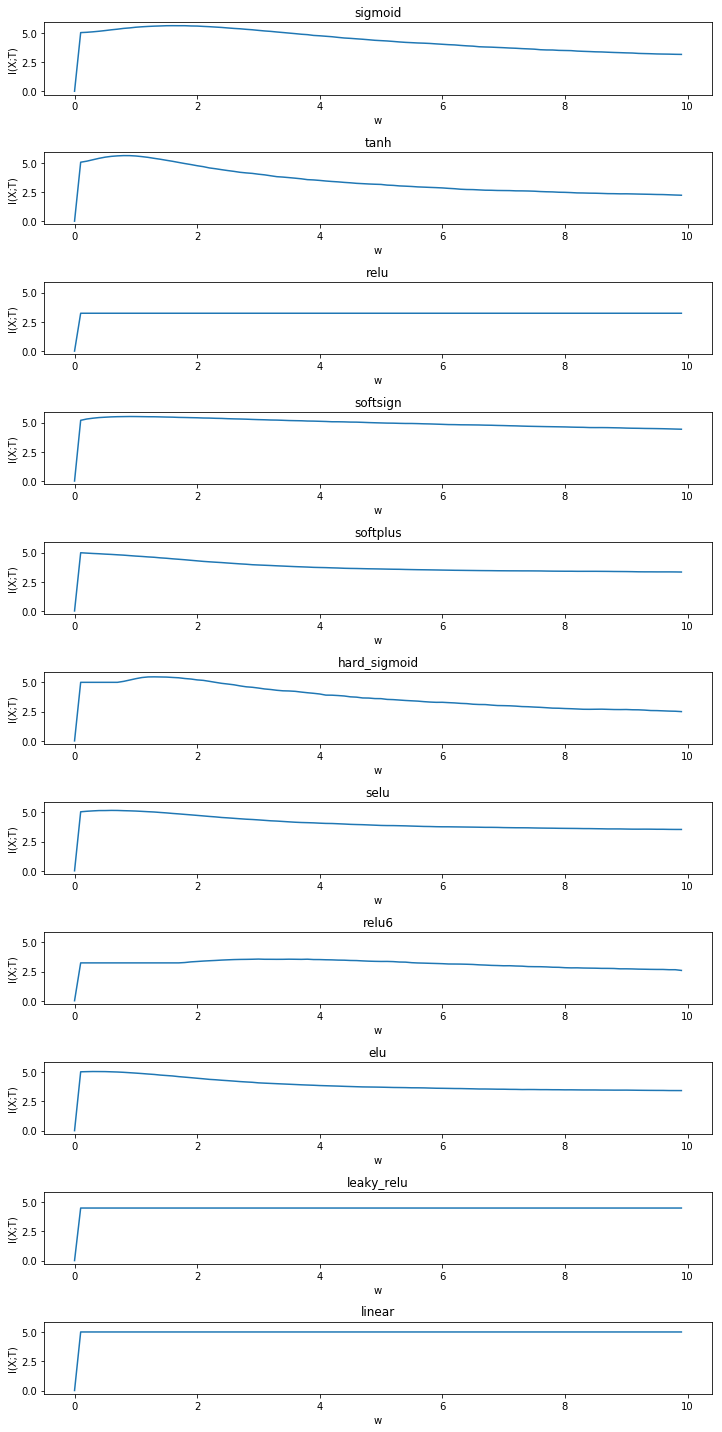

In [10]:
fig, ax = plt.subplots(nrows=len(outputs), figsize=(10, 20), sharey=True)
ax = ax.flat
for ax_idx, (activation_function, Y) in enumerate(outputs.items()):
    min_acitivity = Y.min()
    max_acitivity = Y.max()
    
    mi = np.zeros(len(weights))
    for i in range(len(weights)):
        binsize = 0.07
#         bins = np.linspace(min_acitivity, max_acitivity, 50)
        digitized, _ = np.histogram(Y[i], bins=50)
        
        mi[i] = stats.entropy(digitized, base=2) 
    print(mi.max())
    ax[ax_idx].plot(weights,  mi)
    ax[ax_idx].set(title=activation_function, xlabel='w', ylabel='I(X;T)') 
plt.tight_layout()

In [1]:
from sklearn.preprocessing import normalize

5.602973865831246


/home/jarno/.miniconda/envs/dneck/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/jarno/.miniconda/envs/dneck/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/jarno/.miniconda/envs/dneck/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: range parameter must be finite.

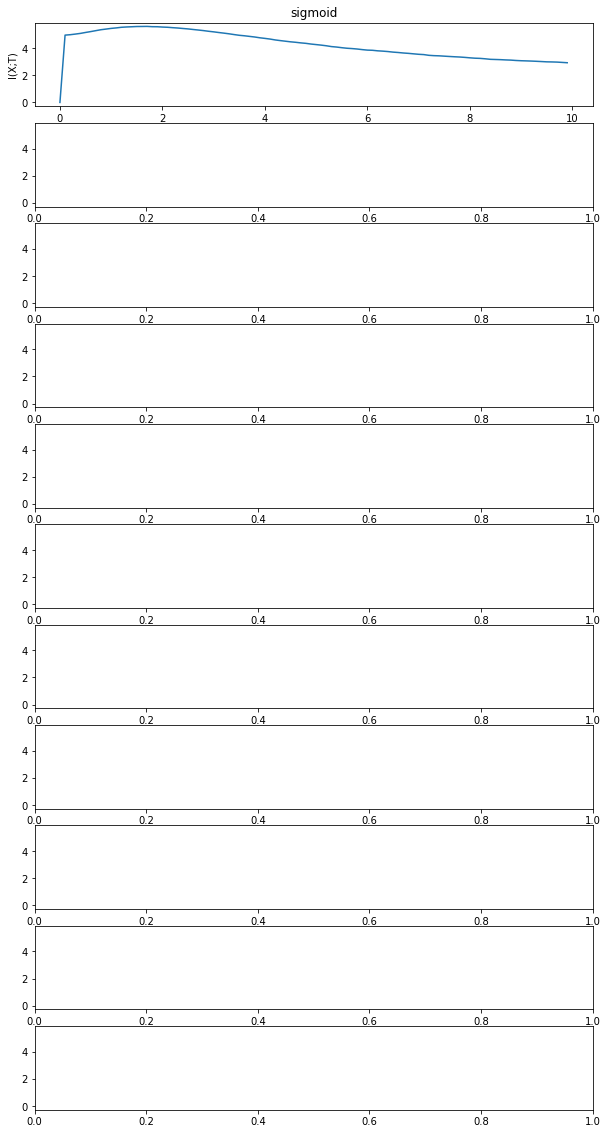

In [11]:
fig, ax = plt.subplots(nrows=len(outputs), figsize=(10, 20), sharey=True)
ax = ax.flat
for ax_idx, (activation_function, Y) in enumerate(outputs.items()):
    min_acitivity = Y.min()
    max_acitivity = Y.max()
    
    mi = np.zeros(len(weights))
    for i in range(len(weights)):
        binsize = 0.07
#         bins = np.linspace(min_acitivity, max_acitivity, 50)
        digitized, _ = np.histogram(Y[i] / np.max(np.abs(Y[i])), bins=50)
        
        mi[i] = stats.entropy(digitized, base=2) 
    print(mi.max())
    ax[ax_idx].plot(weights,  mi)
    ax[ax_idx].set(title=activation_function, xlabel='w', ylabel='I(X;T)') 
plt.tight_layout()

In [ ]:
dig, _ = np.histogram(input_, 50)
stats.entropy(dig)

In [ ]:
np.